In [763]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
import warnings
import scipy.stats as ss
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold,LeaveOneOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.utils import resample

In [764]:
sns.set(style="whitegrid")
df = pd.read_csv("group_9.csv")
print("Dataset dimension:", df.shape)
print(df.info())

Dataset dimension: (3000, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   duration_1                     3000 non-null   float64
 1   duration_2                     3000 non-null   float64
 2   duration_3                     3000 non-null   float64
 3   duration_4                     3000 non-null   float64
 4   duration_5                     3000 non-null   float64
 5   loudness_level                 3000 non-null   float64
 6   popularity_level               3000 non-null   float64
 7   tempo_class                    3000 non-null   float64
 8   time_signature                 3000 non-null   float64
 9   key_mode                       3000 non-null   float64
 10  artist_song_count              3000 non-null   float64
 11  album_freq                     3000 non-null   float64
 12  movement_index    

UNIVARIATE ANALYSIS 
    (Distribution of individual numerical features)

In [765]:
# Initial setup
numeric_columns = [
    'time_signature', 'key_mode', 'artist_song_count', 'album_freq', 'movement_index',
    'intensity_level', 'verbal_density', 'purity_score', 'positivity_index', 'activity_rate',
    'loudness_intensity', 'happy_dance', 'acoustics_instrumental', 'artists_avg_popularity',
    'tempo_vs_genre', 'energy_rank_pct', 'loud_energy_ratio', 'mood_pca', 'mood_cluster',
    'acoustic_valence_mood_cluster', 'signal_strength', 'focus_factor', 'ambient_level',
    'key_sin', 'key_cos', 'duration_log', 'duration_log_z', 'loudness_yeo', 'temp_zscore',
    'resonance_factor', 'timbre_index', 'distorted_movement', 'signal_power'
]
numerical_target = 'target_regression'
df[numeric_columns] = df[numeric_columns].replace(',', '.', regex=True).astype(float)

In [766]:
num_desc = df[numeric_columns].describe().T
num_desc["skew"] = df[numeric_columns].skew()
num_desc["kurtosis"] = df[numeric_columns].kurtosis()
display(num_desc)

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
time_signature,3000.0,0.063872,0.838877,-6.712656,0.221824,2.218242e-01,0.221824,2.533318,-4.879960,34.262170
key_mode,3000.0,0.029570,1.005989,-1.511882,-0.920961,1.764658e-01,1.020640,1.611562,-0.020314,-1.289904
artist_song_count,3000.0,-0.146857,0.823009,-0.575306,-0.551262,-4.550858e-01,-0.214645,4.257551,3.447694,13.028413
album_freq,3000.0,0.417375,1.596000,-0.514901,-0.472292,-4.296837e-01,0.422488,7.282470,1.999196,3.765857
movement_index,3000.0,-0.135341,1.319168,-2.903623,-1.175799,-3.342500e-02,1.044124,2.254205,-0.270752,-1.103825
intensity_level,3000.0,0.477341,0.525001,-3.120303,0.241274,5.662676e-01,0.819482,1.672577,-1.470914,4.337357
verbal_density,3000.0,0.161741,0.779793,-0.575532,-0.340977,-1.064227e-01,0.343771,6.481912,2.263091,6.543672
purity_score,3000.0,-0.631092,0.488400,-0.947029,-0.945871,-8.554555e-01,-0.513973,2.015192,2.335147,6.056960
positivity_index,3000.0,-0.258656,1.062009,-1.760264,-1.208501,-4.727532e-01,0.647744,1.963026,0.368025,-1.125438
activity_rate,3000.0,0.115770,1.058417,-2.358774,-0.870874,9.494597e-02,0.928419,3.064775,0.240392,-0.993208


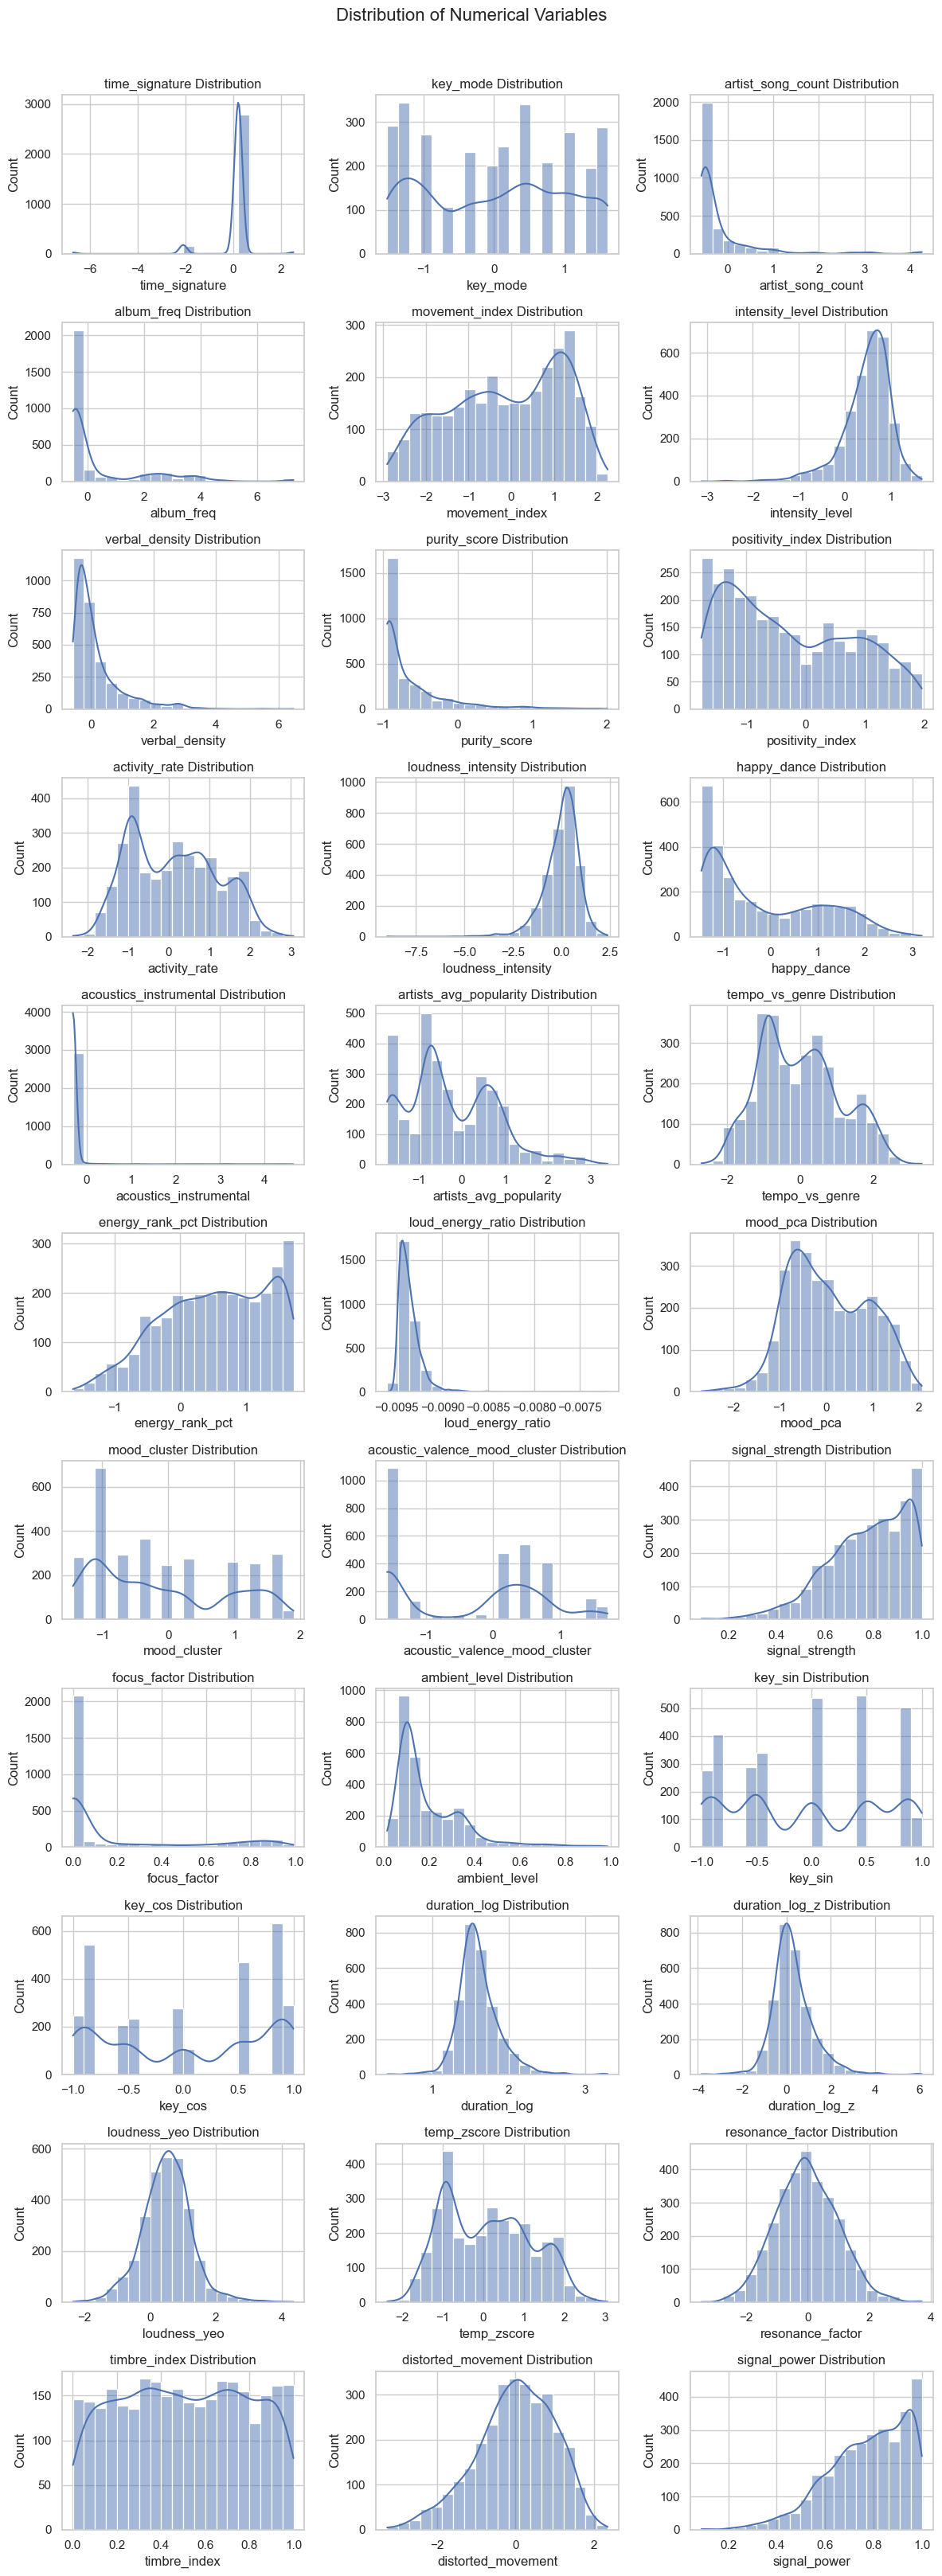

In [767]:

# Grid setup
n = len(numeric_columns)
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

# Flatten axes
axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Generate histograms
for i, col in enumerate(numeric_columns):
    ax = axes_flat[i]
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'{col} Distribution')

# Hide unused axes if any
for j in range(len(numeric_columns), len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()




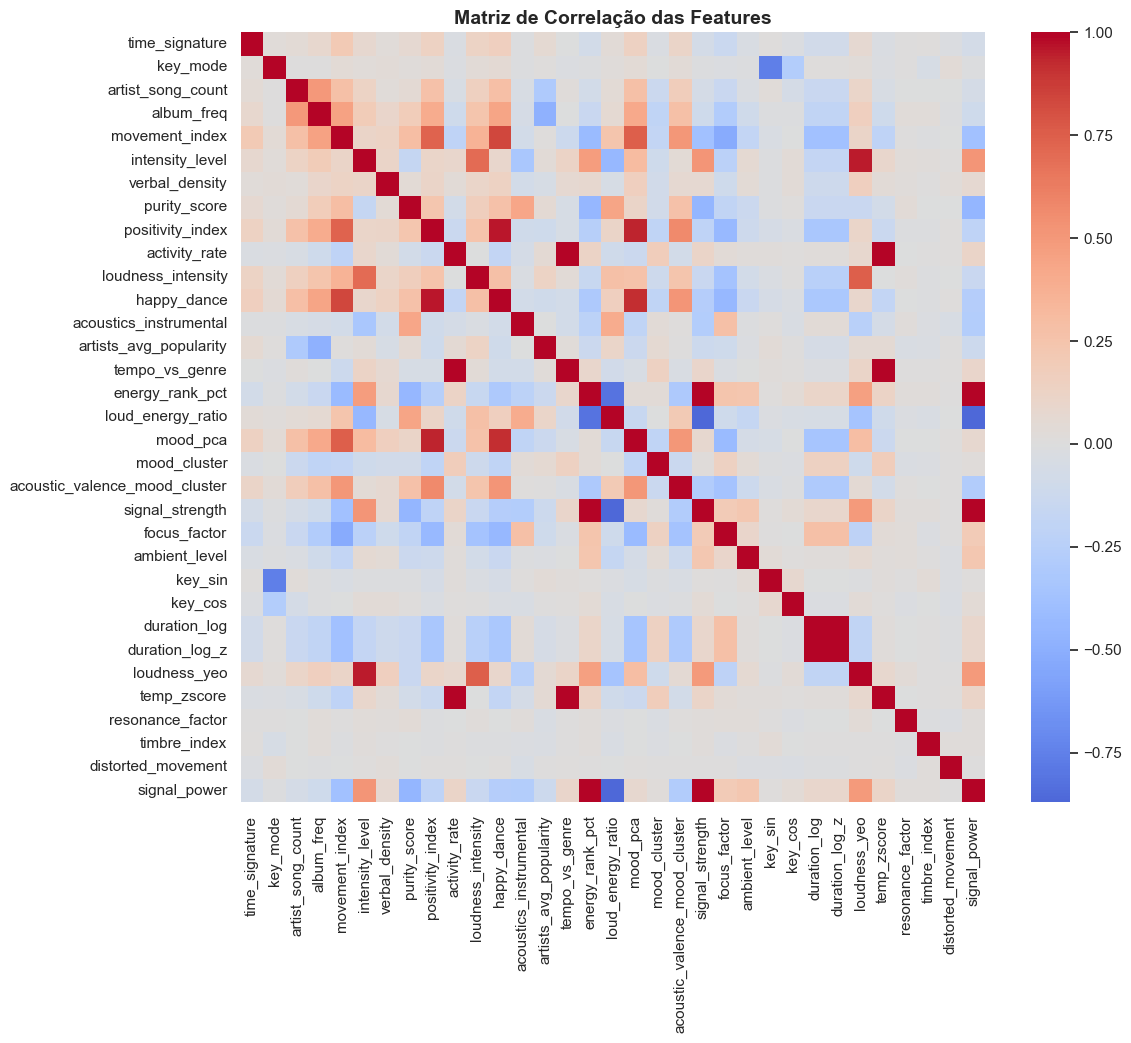

In [768]:
corr_matrix = df[numeric_columns].corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação das Features", fontsize=14, fontweight='bold')
plt.show()

BIVARIATE ANALYSIS (Correlation between numerical features and the target variable)

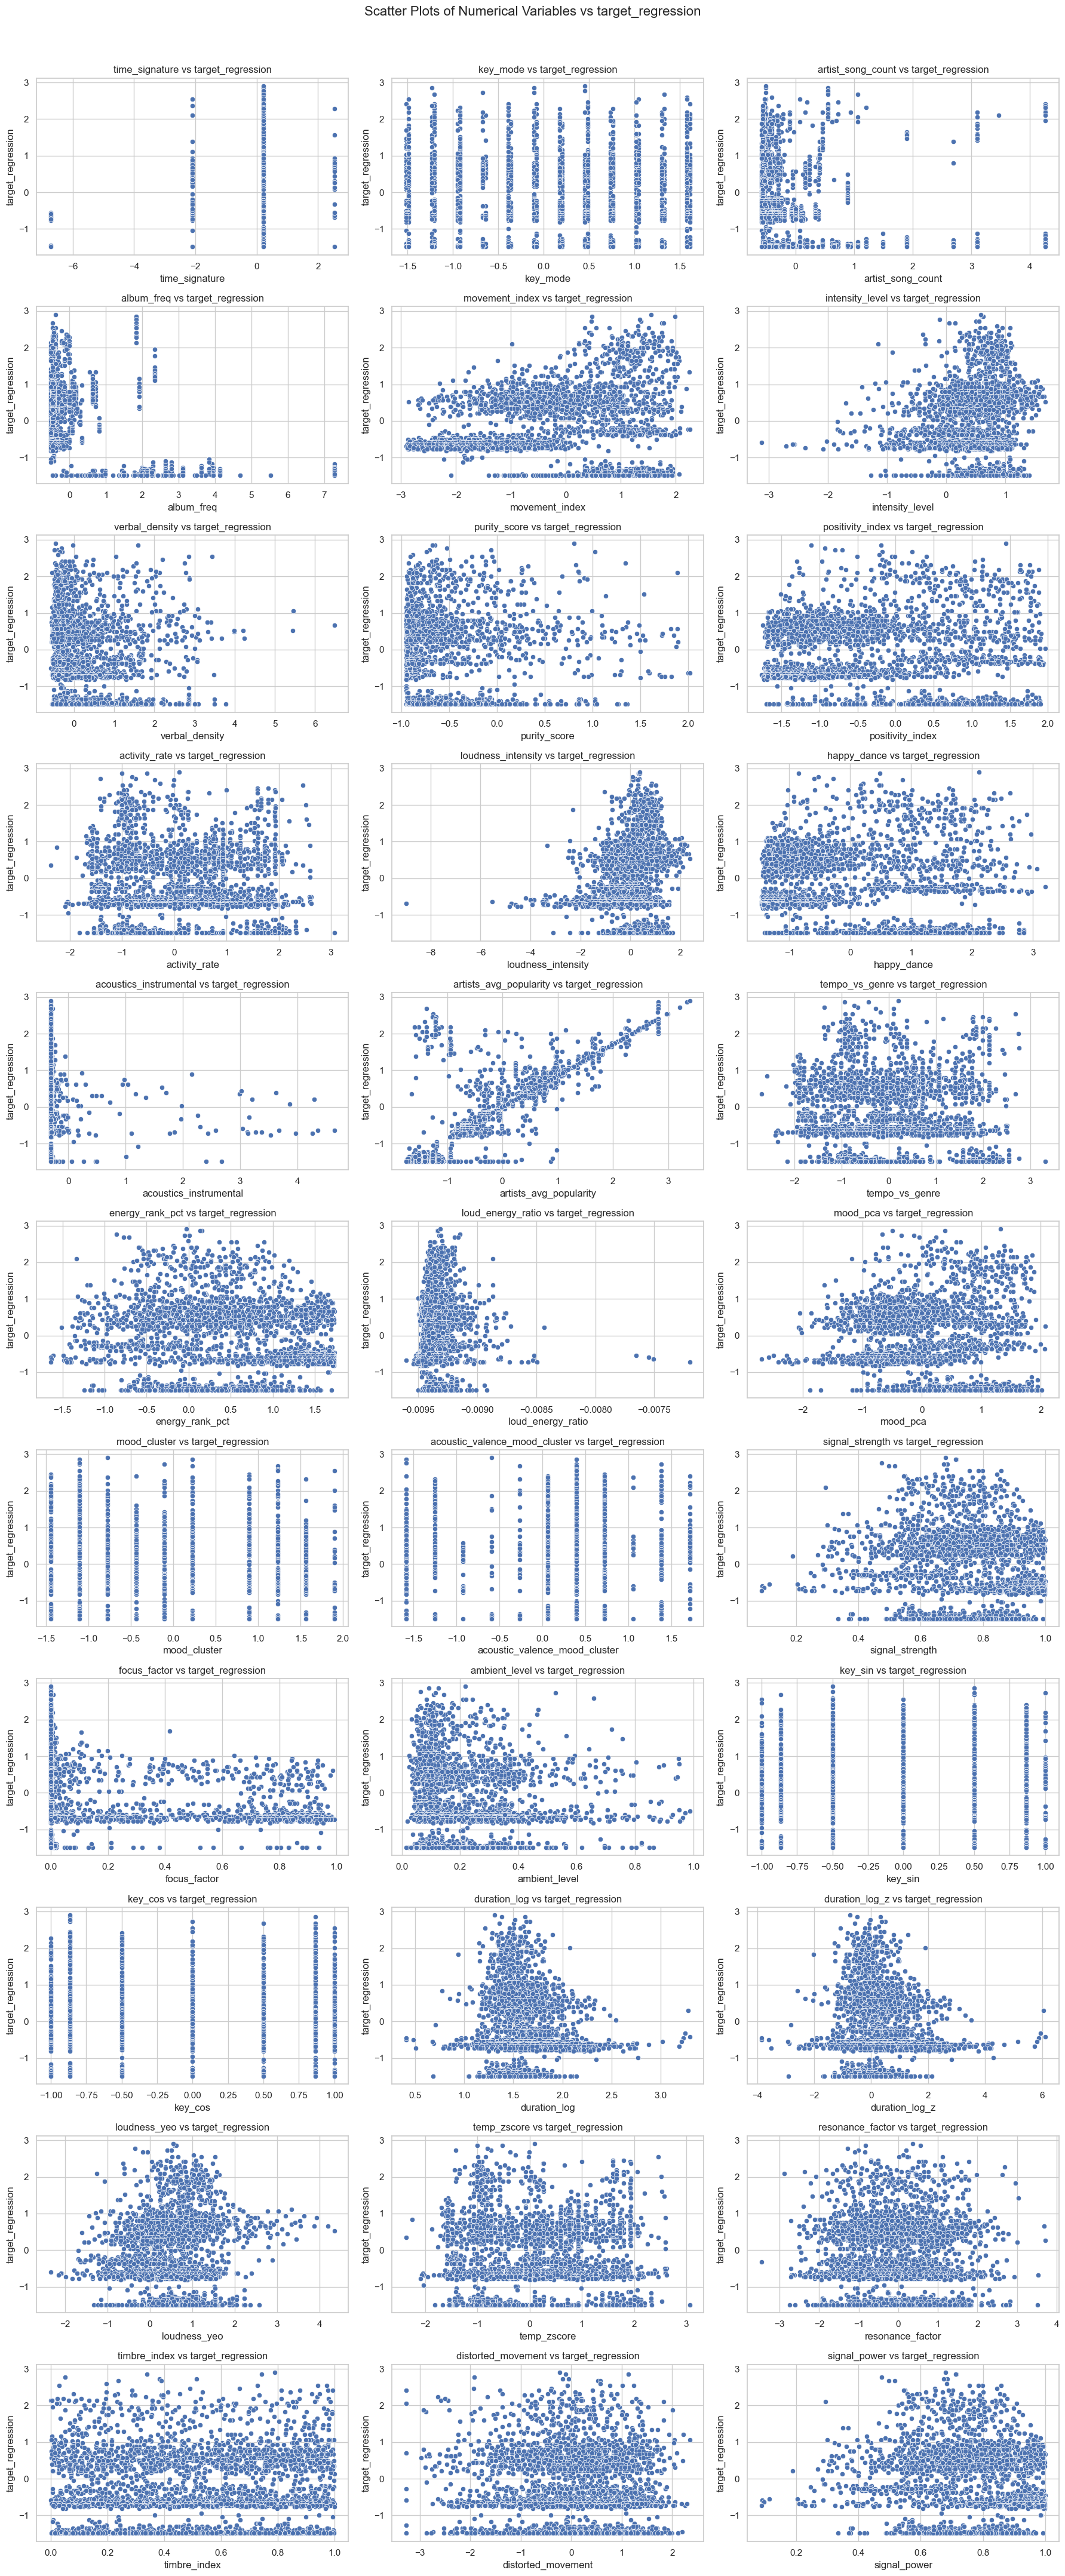

In [769]:
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
fig.suptitle(f'Scatter Plots of Numerical Variables vs {numerical_target}', fontsize=16)

axes = axes.flatten() # Flatten axes

for idx, col in enumerate(numeric_columns):
    sns.scatterplot(x=col, y=numerical_target, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} vs {numerical_target}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel(numerical_target)

# Hide extra subplots (if any)
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

UNIVARIATE ANALYSIS 
    (Distribution of individual categorical features)

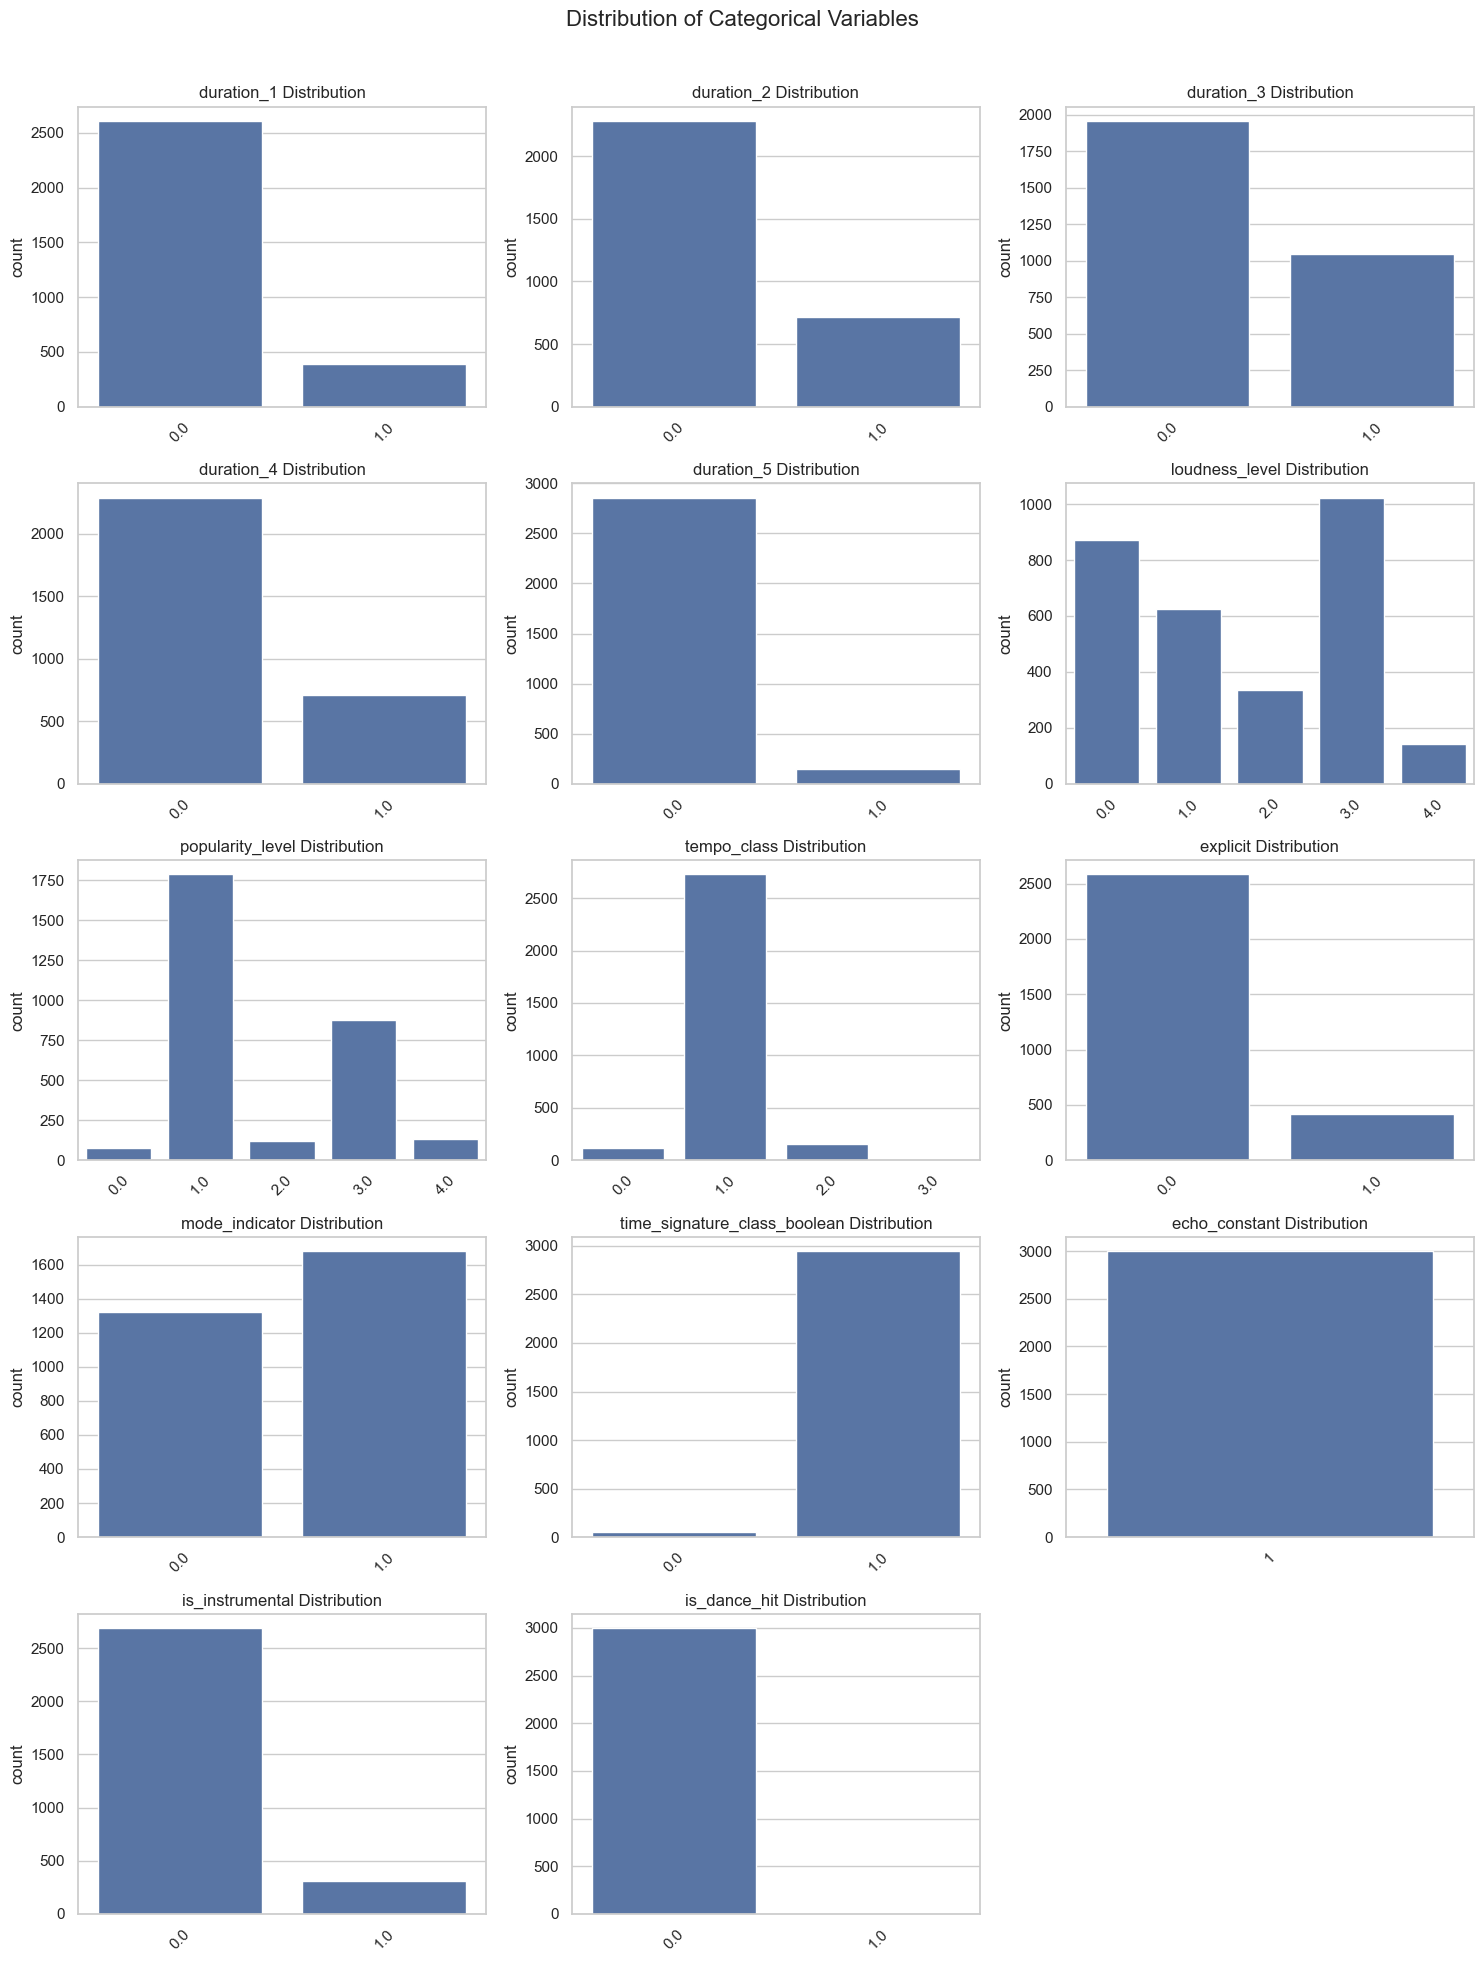

In [770]:
# Initial setup
#O target não é uma variável explicativa, é a variável a prever. separar 
categorical_columns = [
    'duration_1',
    'duration_2',
    'duration_3',
    'duration_4',
    'duration_5',
    'loudness_level',
    'popularity_level',
    'tempo_class',
    'explicit',
    'mode_indicator',
    'time_signature_class_boolean',
'echo_constant',
    'is_instrumental',
    'is_dance_hit'
]
categorica_target = 'target_class'

# Grid setup
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

axes = axes.flatten()  # Flatten axes

for idx, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel("")                        # Remove x labels for cleaner look if long names
    axes[idx].tick_params(axis='x', rotation=45)    # Rotate labels for readability

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [771]:
def cramers_v(x, y):
    confusion = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion)[0]
    n = confusion.sum().sum()
    phi2 = chi2 / n
    r, k = confusion.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

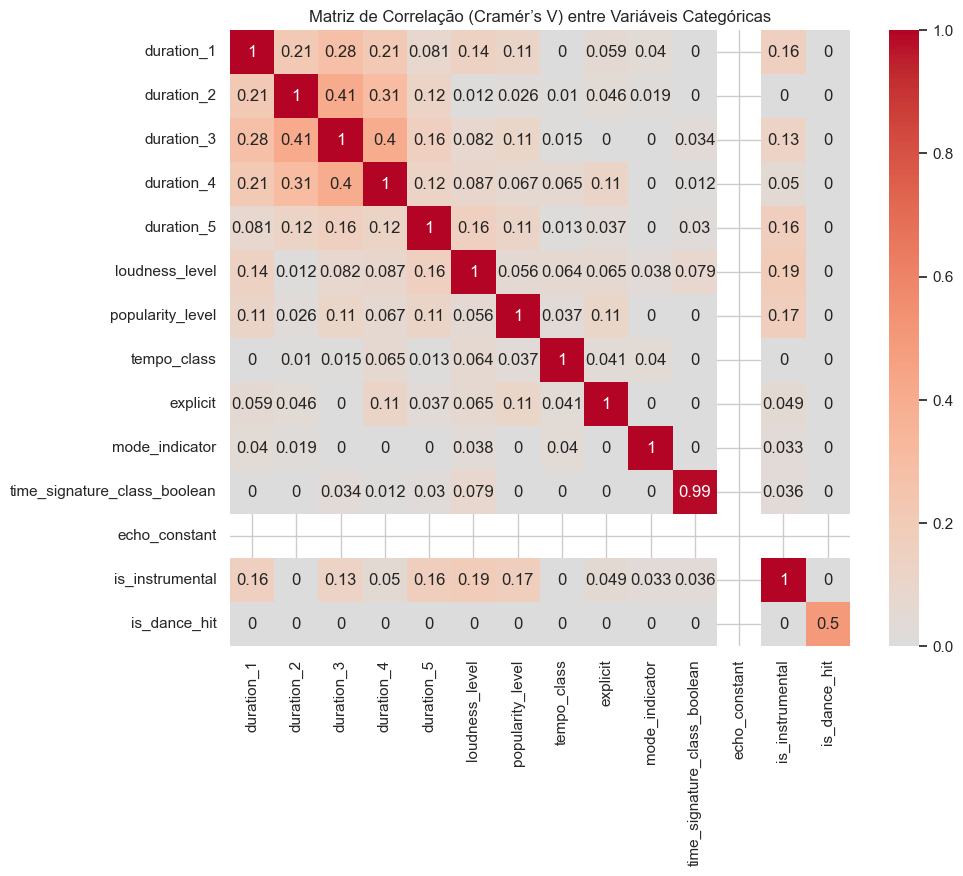

In [772]:
cramers = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=float)

# Calcular Cramer's V para todos os pares
for c1 in categorical_columns:
    for c2 in categorical_columns:
        cramers.loc[c1, c2] = cramers_v(df[c1], df[c2])

plt.figure(figsize=(10,8))
sns.heatmap(cramers.astype(float), annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação (Cramér’s V) entre Variáveis Categóricas")
plt.show()

BIVARIATE ANALYSIS (Correlation between numerical features and the target variable)

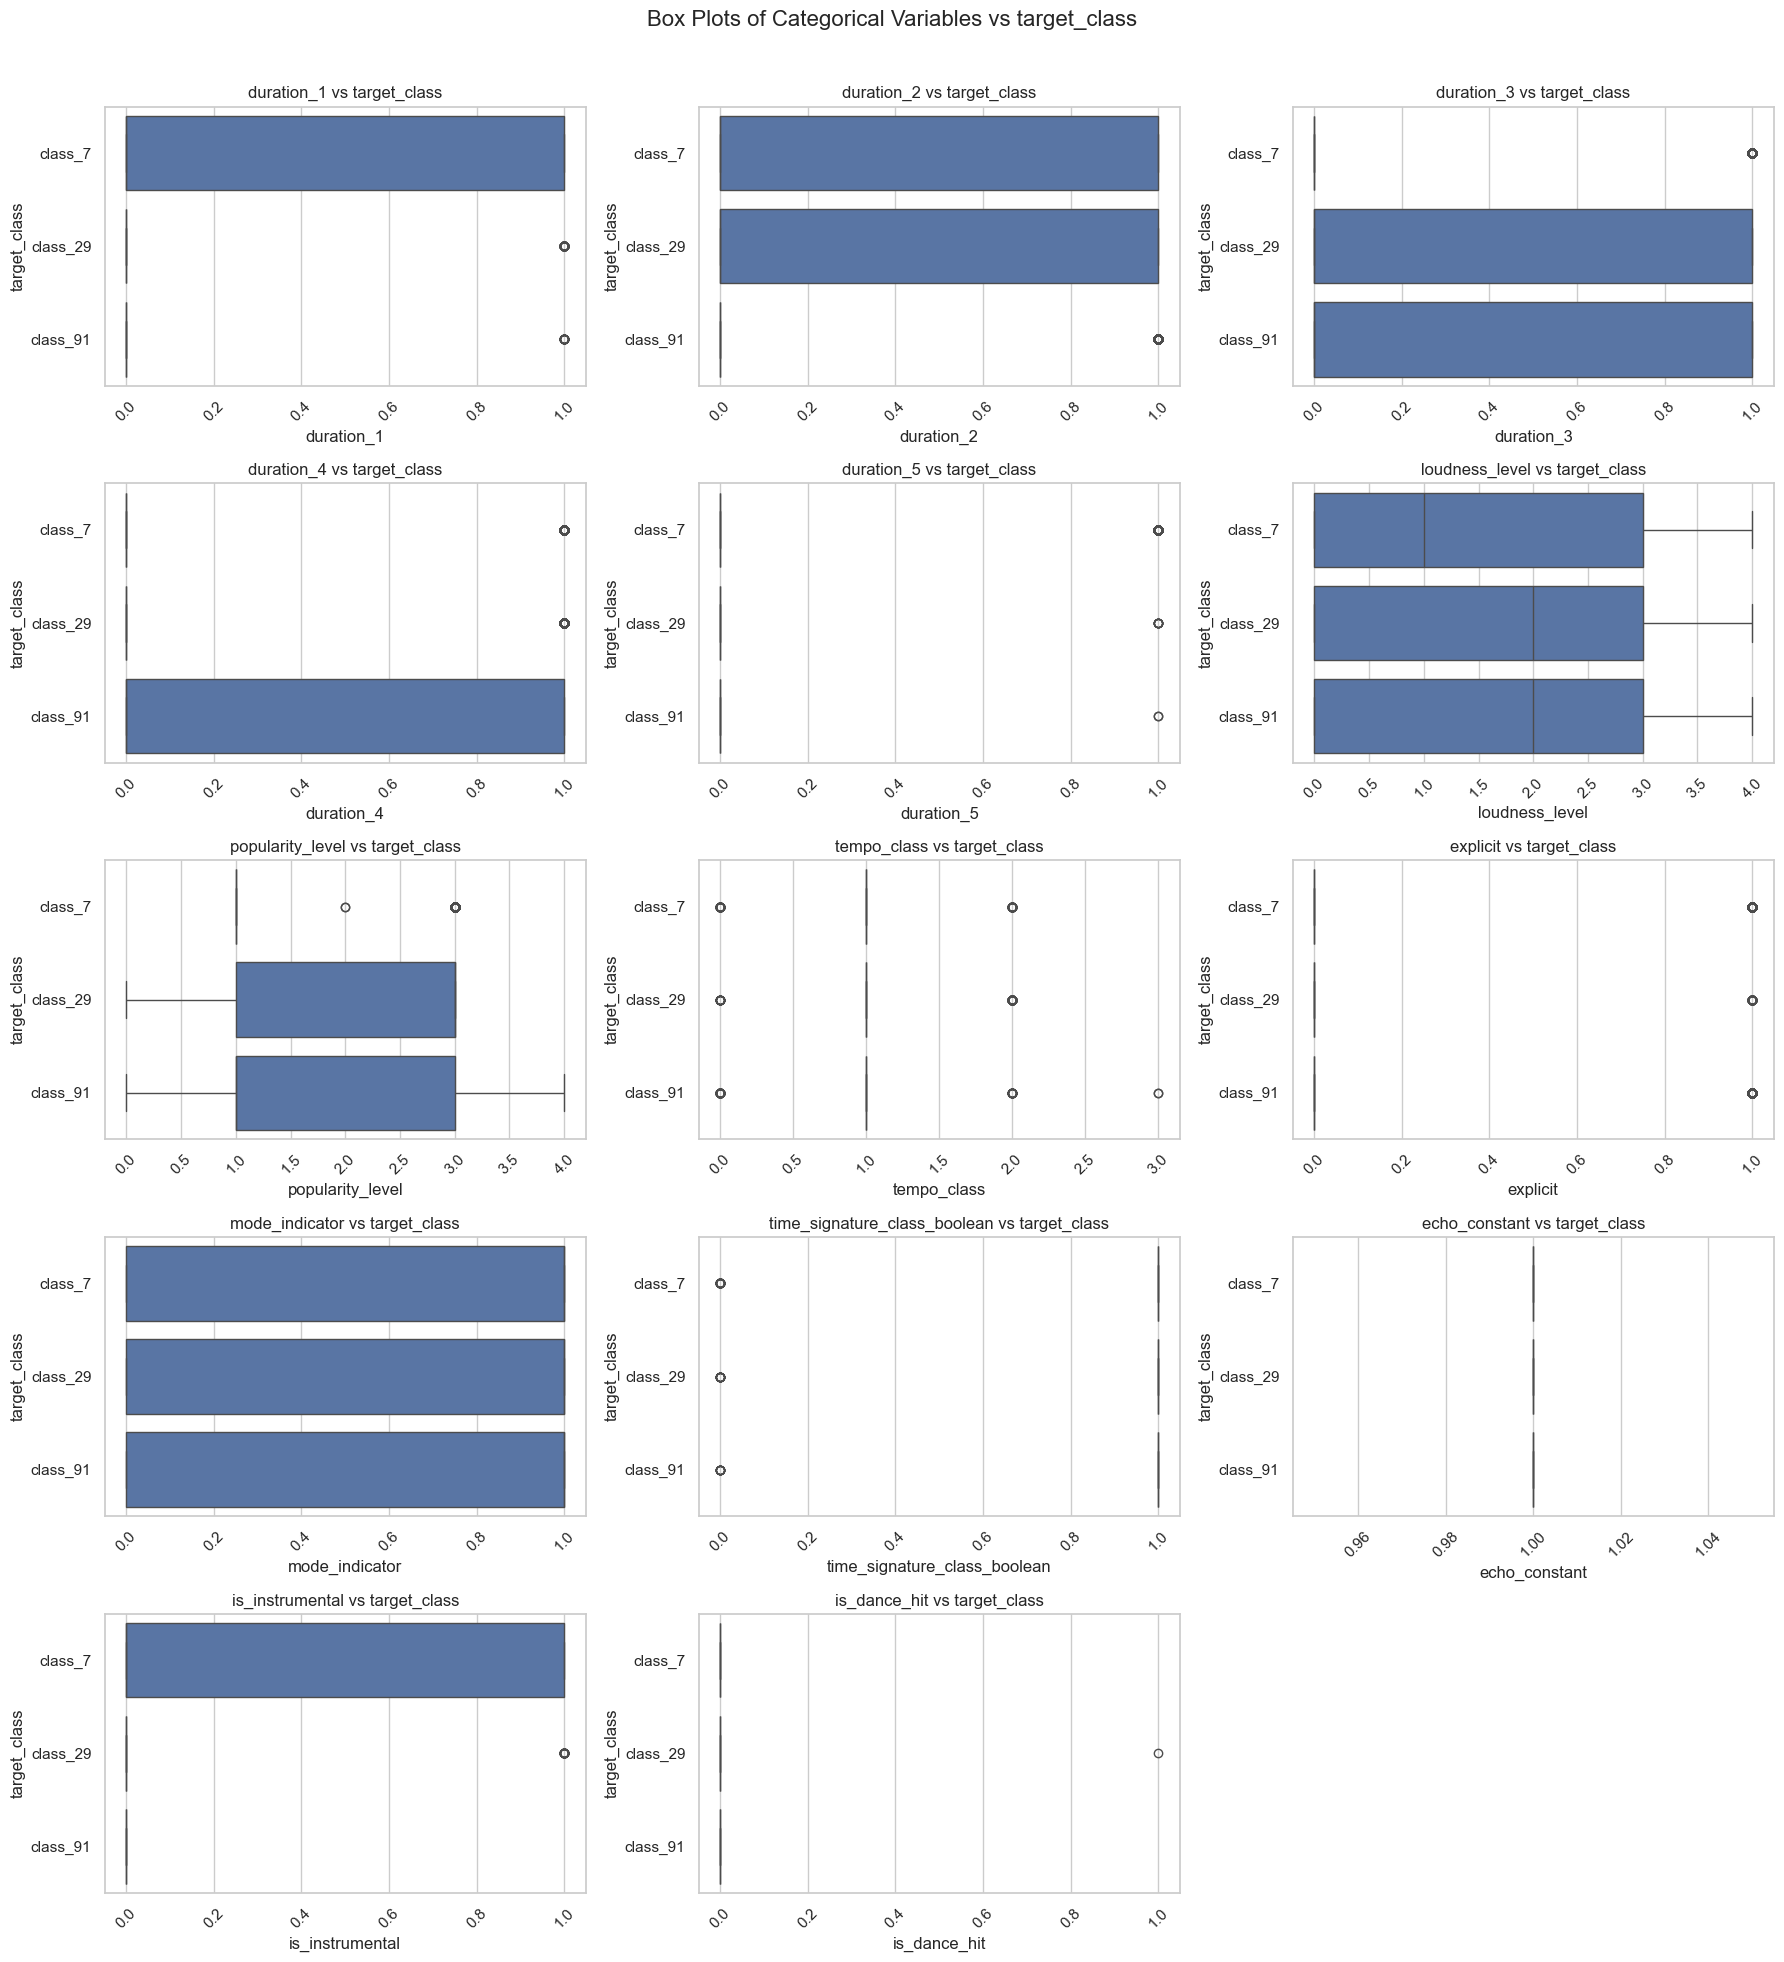

In [773]:
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
fig.suptitle(f'Box Plots of Categorical Variables vs {categorica_target}', fontsize=16)

axes = axes.flatten() # Flatten axes

for idx, col in enumerate(categorical_columns):
    sns.boxplot(x=col, y=categorica_target, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} vs {categorica_target}')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Após analise de distribuições, correlações, etc etc aplicamos


In [774]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 4. Encontrar colunas com correlação acima do limiar 
threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Features removidas por alta correlação ({len(to_drop)}):")
print(to_drop)



Features removidas por alta correlação (8):
['happy_dance', 'tempo_vs_genre', 'mood_pca', 'signal_strength', 'duration_log_z', 'loudness_yeo', 'temp_zscore', 'signal_power']


In [775]:
# remover colunas correlacionadas

dfn_reduced = df[numeric_columns].drop(columns=to_drop)
#dfn_reduced = df[numeric_columns]#.drop(columns=to_drop)
# atualizar a lista de colunas numéricas
numeric_columns = [c for c in numeric_columns if c not in to_drop]

In [776]:
#remover echo constant das categóricas por ser constante
dfc_reduced = df[categorical_columns].drop(columns=['echo_constant'])

In [777]:
#juntar as categoricas as numericas
# 
df_all = pd.concat([dfn_reduced, dfc_reduced], axis=1)
features_all = df_all.columns.tolist()
print(df_all)

      time_signature  key_mode  artist_song_count  album_freq  movement_index  \
0           0.221824 -0.949100           0.386456   -0.301858       -0.799810   
1          -2.089669  1.020640          -0.431042   -0.429684       -1.825498   
2           0.221824  0.204605           0.170060   -0.387075       -0.569318   
3           0.221824 -0.076786          -0.527218   -0.472292       -2.436301   
4          -2.089669 -1.511882           0.386456   -0.387075       -0.603892   
...              ...       ...                ...         ...             ...   
2995        0.221824 -0.358178          -0.575306   -0.514901        1.395623   
2996        0.221824  1.583423          -0.575306   -0.514901        1.044124   
2997        0.221824 -1.483743          -0.551262   -0.472292       -0.073761   
2998        0.221824  0.457857          -0.527218   -0.472292        0.104870   
2999       -2.089669 -0.920961           3.464097   -0.387075       -0.984203   

      intensity_level  verb

# 3 Methods Application - Regression


Simple Linear Regression

In [778]:
results = []

for col in features_all:
    X = df_all[[col]]  # variável independente (1 coluna)
    y = df['target_regression']  # variável dependente

    # dividir treino/teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # criar e treinar modelo linear simples
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # previsões
    y_pred = lr.predict(X_test)

    # métricas
    slope = lr.coef_[0]  # coeficiente angular
    intercept = lr.intercept_  # intercepto
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # guardar resultados
    results.append((col, r2,slope, intercept, mae, mse))

# criar DataFrame ordenado
slr_results = pd.DataFrame(
    results,
    columns=['Feature',  'R2', 'Slope', 'Intercept', 'MAE', 'MSE']
).sort_values(by='R2', ascending=False)

print(slr_results)

                          Feature        R2       Slope  Intercept       MAE  \
12         artists_avg_popularity  0.813562    0.829794   0.023973  0.190340   
31               popularity_level  0.483737    0.679458  -1.374511  0.454850   
3                      album_freq  0.277691   -0.330261  -0.046919  0.693089   
2               artist_song_count  0.047146   -0.255324  -0.221472  0.808535   
10             loudness_intensity  0.017988    0.131710  -0.187923  0.812958   
17                   focus_factor  0.013687   -0.335967  -0.129973  0.815403   
36                is_instrumental  0.007839   -0.282130  -0.159811  0.825922   
8                positivity_index  0.004233   -0.062348  -0.204529  0.840784   
13                energy_rank_pct  0.004172   -0.177508  -0.096551  0.820289   
0                  time_signature  0.003997    0.065953  -0.193017  0.832842   
27                     duration_3  0.002799    0.083147  -0.217005  0.835355   
21                   duration_log  0.002

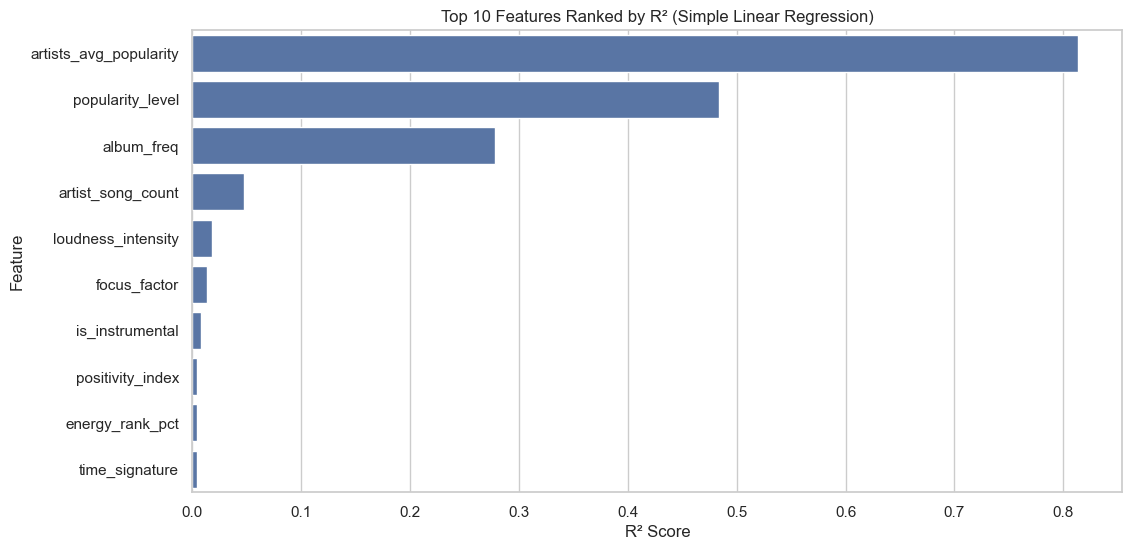

In [779]:
plt.figure(figsize=(12, 6))
sns.barplot(x='R2', y='Feature', data=slr_results.head(10))  # Plot top 10
plt.title('Top 10 Features Ranked by R² (Simple Linear Regression)')
plt.xlabel('R² Score')
plt.ylabel('Feature')
plt.show()


Top 5 features por R²:
                   Feature        R2     Slope  Intercept       MAE       MSE
12  artists_avg_popularity  0.813562  0.829794   0.023973  0.190340  0.182667
31        popularity_level  0.483737  0.679458  -1.374511  0.454850  0.505821
3               album_freq  0.277691 -0.330261  -0.046919  0.693089  0.707699
2        artist_song_count  0.047146 -0.255324  -0.221472  0.808535  0.933581
10      loudness_intensity  0.017988  0.131710  -0.187923  0.812958  0.962149

Melhor feature: artists_avg_popularity


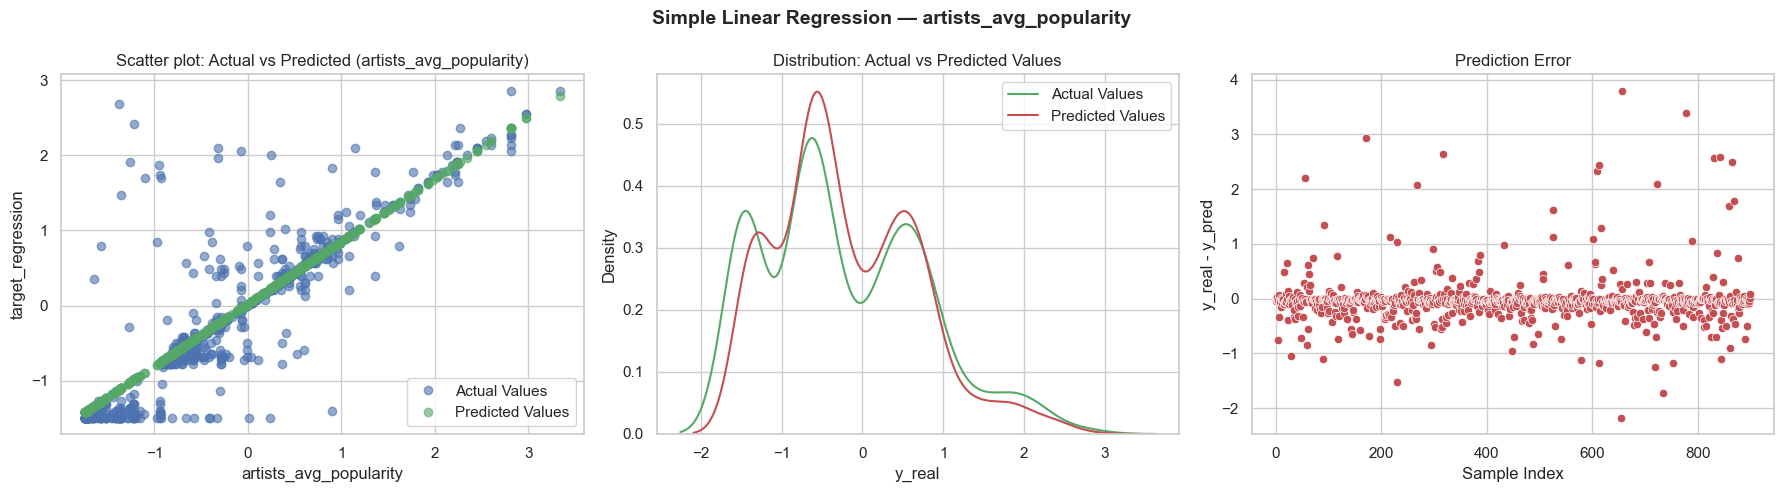

In [780]:
slr_results = pd.DataFrame(
    results,
    columns=['Feature', 'R2', 'Slope', 'Intercept', 'MAE', 'MSE']
).sort_values(by='R2', ascending=False)

print("\nTop 5 features por R²:")
print(slr_results.head(5))

# --- escolher a melhor feature ---
best_feature = slr_results.iloc[0]['Feature']
print(f"\nMelhor feature: {best_feature}")

# --- reconstruir dados dessa feature para visualização ---
X = df_all[[best_feature]]
y = df['target_regression']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Erro individual
slr_error = y_test - y_pred

# DataFrame auxiliar
df_plot = pd.DataFrame({
    best_feature: X_test[best_feature],
    'y_real': y_test,
    'y_pred': y_pred,
    'slr_error': slr_error
}).reset_index(drop=True)

# --- visualizações ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1️⃣ Scatter plot: reais vs previstos
axes[0].plot(df_plot[best_feature], df_plot['y_real'], 'bo', label='Actual Values', alpha=0.6)
axes[0].plot(df_plot[best_feature], df_plot['y_pred'], 'go', label='Predicted Values', alpha=0.6)
axes[0].set_title(f"Scatter plot: Actual vs Predicted ({best_feature})")
axes[0].set_xlabel(best_feature)
axes[0].set_ylabel("target_regression")
axes[0].legend()

# 2️⃣ Distribuição (KDE) — reais vs previstos
sns.kdeplot(df_plot['y_real'], color="g", label="Actual Values", ax=axes[1])
sns.kdeplot(df_plot['y_pred'], color="r", label="Predicted Values", ax=axes[1])
axes[1].set_title("Distribution: Actual vs Predicted Values")
axes[1].legend()

# 3️⃣ Erro de previsão
sns.scatterplot(x=df_plot.index, y='slr_error', data=df_plot, color="r", ax=axes[2])
axes[2].set_title("Prediction Error")
axes[2].set_xlabel("Sample Index")
axes[2].set_ylabel("y_real - y_pred")

fig.suptitle(f"Simple Linear Regression — {best_feature}", fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

Multiple linear regression


In [781]:
X = df_all
y = df['target_regression']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)


In [782]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [783]:
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)

y_pred_train = mlr.predict(X_train_scaled)
y_pred_test = mlr.predict(X_test_scaled)

lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train_scaled, y_train)

yl_pred_train = lasso.predict(X_train)
yl_pred_test = lasso.predict(X_test)
# Métricas
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2l_train = r2_score(y_train, yl_pred_train)
r2l_test = r2_score(y_test, yl_pred_test)

mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

mael = mean_absolute_error(y_test, yl_pred_test)
rmsel = np.sqrt(mean_squared_error(y_test, yl_pred_test))

print(f"R² Treino: {r2_train:.4f}")
print(f"R² TreinoL: {r2l_train:.4f}")

print(f"R² Teste:  {r2_test:.4f}")
print(f"R² TesteL:  {r2l_test:.4f}")

print(f"MAE: {mae:.4f}")
print(f"MAEL: {mael:.4f}")

print(f"RMSE: {rmse:.4f}")
print(f"RMSEL: {rmsel:4f}")


R² Treino: 0.8147
R² TreinoL: 0.7397
R² Teste:  0.8402
R² TesteL:  0.7612
MAE: 0.2456
MAEL: 0.3850
RMSE: 0.3940
RMSEL: 0.481684


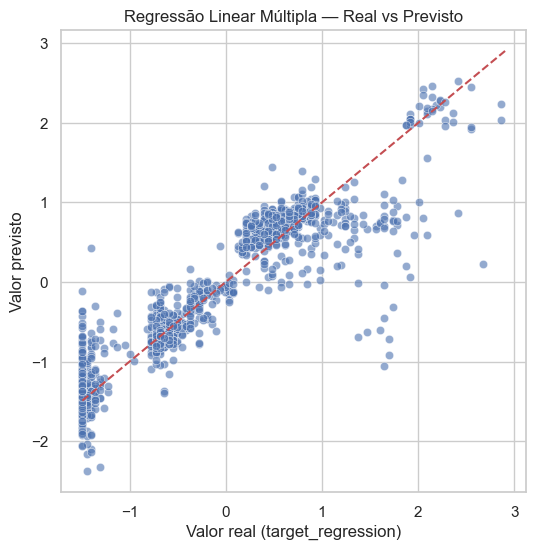

In [784]:

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
plt.xlabel("Valor real (target_regression)")
plt.ylabel("Valor previsto")
plt.title("Regressão Linear Múltipla — Real vs Previsto")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.show()

# 4 Methods Application - Classification

In [785]:

X = df_all
y = df['target_class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [786]:
def describe_scores(name, scores):
    desc = {
        'mean': np.mean(scores),
        'std': np.std(scores),
        'min': np.min(scores),
        'max': np.max(scores),
        'median': np.median(scores),
        'q25': np.percentile(scores, 25),
        'q75': np.percentile(scores, 75),
        'iqr': np.percentile(scores, 75) - np.percentile(scores, 25),
    }
    print(f"\n{name} results:")
    for k, v in desc.items():
        print(f"  {k:>7}: {v:.4f}")
    return desc

Logistic regression


In [787]:
logr = LogisticRegression(max_iter=1000, random_state=42)
logr.fit(X_train, y_train)

# Predictions
y_pred_train = logr.predict(X_train_scaled)
y_pred_test = logr.predict(X_test_scaled)

print("=== Logistic Regression Performance ===")
print(f"Accuracy (Train): {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Accuracy (Test):  {accuracy_score(y_test, y_pred_test):.4f}")

print("\n--- Classification Report (Test) ---")
print(classification_report(y_test, y_pred_test))

print("\n--- Confusion Matrix (Test) ---")
print(confusion_matrix(y_test, y_pred_test))

variances = X_train_scaled.var(axis=0)
low_var_features = np.array(X.columns)[variances < 0.01]
print("Features com baixa variância:", low_var_features)


# --- 1) K-Fold (k=5)
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_5 = cross_val_score(logr, X_train_scaled, y_train, cv=cv5, scoring='accuracy')
desc_5 = describe_scores("Cross Validation (k=5)", scores_5)

# --- 2) K-Fold (k=10)
cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_10 = cross_val_score(logr, X_train_scaled, y_train, cv=cv10, scoring='accuracy')
desc_10 = describe_scores("Cross Validation (k=10)", scores_10)

# --- 3) Leave-One-Out
loo = LeaveOneOut()
scores_loo = cross_val_score(logr, X_train_scaled, y_train, cv=loo, scoring='accuracy')
desc_loo = describe_scores("Leave-One-Out (LOOCV)", scores_loo)

# --- 4) Bootstrap
n_iterations = 100
scores_boot = []
for i in range(n_iterations):
    X_res, y_res = resample(X_train_scaled, y_train, replace=True, random_state=42+i)
    logr.fit(X_res, y_res)
    y_pred = logr.predict(X_test_scaled)
    scores_boot.append(accuracy_score(y_test, y_pred))

scores_boot = np.array(scores_boot)
desc_boot = describe_scores("Bootstrap (100 samples)", scores_boot)

=== Logistic Regression Performance ===
Accuracy (Train): 0.8628
Accuracy (Test):  0.8592

--- Classification Report (Test) ---
              precision    recall  f1-score   support

    class_29       0.84      0.72      0.78       393
     class_7       0.91      0.92      0.92       415
    class_91       0.82      0.93      0.87       392

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200


--- Confusion Matrix (Test) ---
[[284  34  75]
 [ 29 383   3]
 [ 26   2 364]]
Features com baixa variância: []

Cross Validation (k=5) results:
     mean: 0.8778
      std: 0.0216
      min: 0.8444
      max: 0.9000
   median: 0.8861
      q25: 0.8611
      q75: 0.8972
      iqr: 0.0361

Cross Validation (k=10) results:
     mean: 0.8794
      std: 0.0197
      min: 0.8333
      max: 0.9111
   median: 0.8806
      q25: 0.8736
      q75: 0.8875
      iqr: 0.0139

Leave-One-Out (LOOCV) r

LDA


QDA